In [1]:
# #https://github.com/MachineLearningByte/Keras-Iris-Dataset/blob/master/Iris%20Dataset-Keras.ipynb
# # https://blog.fastforwardlabs.com/2016/02/24/hello-world-in-keras-or-scikit-learn-versus.html
# # https://towardsdatascience.com/multi-label-image-classification-with-neural-network-keras-ddc1ab1afede
# # https://www.tensorflow.org/tutorials/customization/custom_training_walkthrough
!pip install -q -U tensorflow_hub
!pip install -q -U tensorflow_datasets
!pip install -q -U numpy matplotlib
!pip install -q -U sklearn
!pip install -q -U pandas
!pip install -q -U seaborn
!pip install -q -U keras

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
You should consider upgrading via the 'pip install --upgrade pip' command.
DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
You should consider upgrading via the 'pip install --upgrade pip' command.
DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that dat

In [2]:
import tensorflow as tf;
print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

import datetime
import tensorflow as tf

tf.keras.backend.clear_session()  # For easy reset of notebook state.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd

from keras.utils import np_utils
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import KFold
# from sklearn.preprocessing import LabelEncoder
# from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

np.random.seed(7) # fix random seed for reproducibility

from __future__ import absolute_import, division, print_function, unicode_literals

import os
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model


TensorFlow version: 2.1.0
Eager execution: True


Using TensorFlow backend.


In [16]:
class_names = ['Not Detected', 'Solids', 'Flammable liquids', 'Gasses', 'Metals', 'Electrical', 'Cooking oils']
df = pd.read_csv("model_all_data.csv")
pd.set_option('display.max_columns', 33)
df.tail()

410nm  435nm  460nm  485nm  510nm  535nm  560nm  585nm  610nm  645nm  \
1248    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1249    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1250    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1251    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1252    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

      680nm  705nm  730nm  760nm  810nm  860nm  900nm  940nm   H2  Ethanol  \
1248    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0      0.0   
1249    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0      0.0   
1250    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0      0.0   
1251    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0      0.0   
1252    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0      0.0   

      TVOC  NH3   CO  NO2  C3H8  C4H10  CH4  co2(ppm)  SensTemp(C)  RH(%)  \
1248   0.0  0.0  0.0  0.0   0.0    0.0  0.0       0.0        25.89  42.18   
1249   0.0  0.0  0.0  0.0   0.0    0.0  0.0       0.0        25.89  42.18   
1250   0.0  0.0  0.0  0.0   0.0    0.0  0.0       0.0        25.89  42.18   
1251   0.0  0.0  0.0  0.0   0.0    0.0  0.0       0.0        25.89  42.18   
1252   0.0  0.0  0.0  0.0   0.0    0.0  0.0       0.0        25.89  42.18   

      fireClass  
1248          5  
1249          5  
1250          5  
1251          5  
1252          5

In [17]:
print("csv data shape: {} = (rows, columns)".format(df.shape))
df.dtypes

csv data shape: (1253, 31) = (rows, columns)


410nm          float64
435nm          float64
460nm          float64
485nm          float64
510nm          float64
535nm          float64
560nm          float64
585nm          float64
610nm          float64
645nm          float64
680nm          float64
705nm          float64
730nm          float64
760nm          float64
810nm          float64
860nm          float64
900nm          float64
940nm          float64
H2             float64
Ethanol        float64
TVOC           float64
NH3            float64
CO             float64
NO2            float64
C3H8           float64
C4H10          float64
CH4            float64
co2(ppm)       float64
SensTemp(C)    float64
RH(%)          float64
fireClass        int64
dtype: object

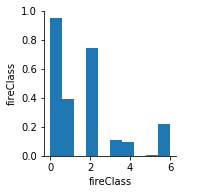

In [30]:
sns.pairplot(df, vars=['fireClass'])
#sns.distplot(df["species"], kde=False);

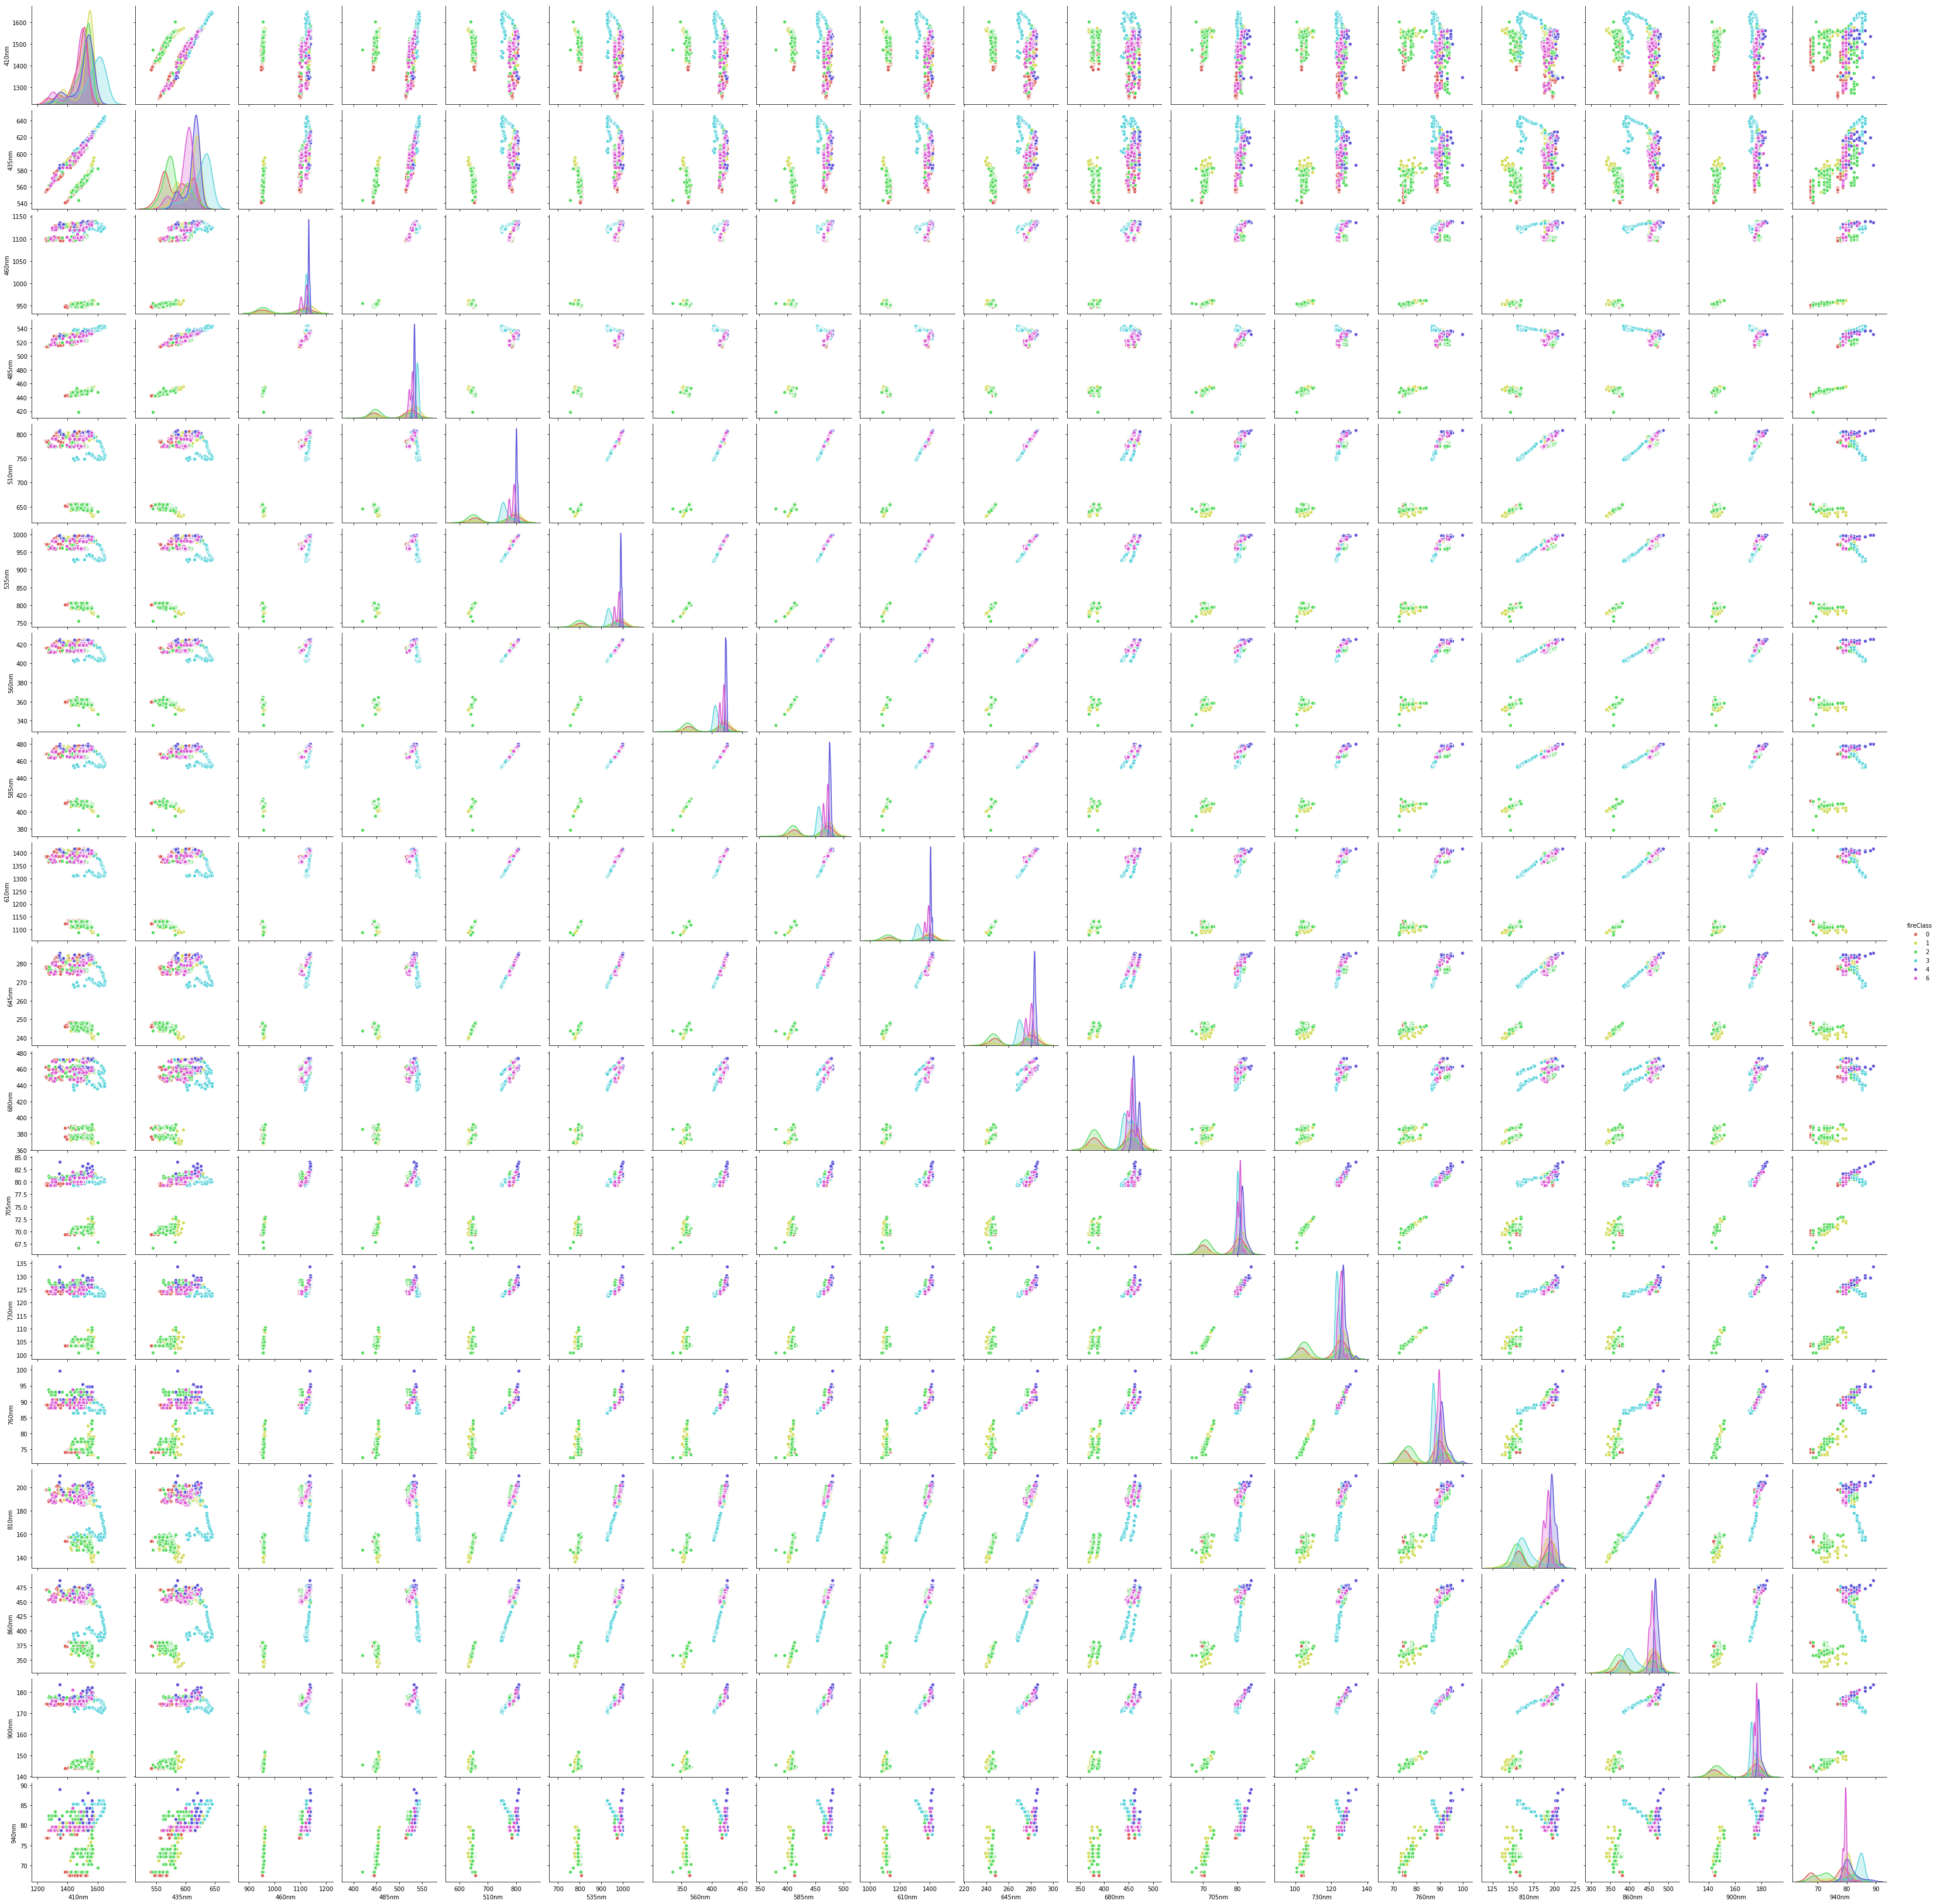

In [5]:
sns.pairplot(df, hue='fireClass', 
            vars=[
                '410nm', '435nm', '460nm', '485nm', '510nm', '535nm', 
                '560nm', '585nm', '610nm', '645nm', '680nm', '705nm',
                '730nm', '760nm', '810nm', '860nm', '900nm', '940nm'
            ],
            palette="hls")

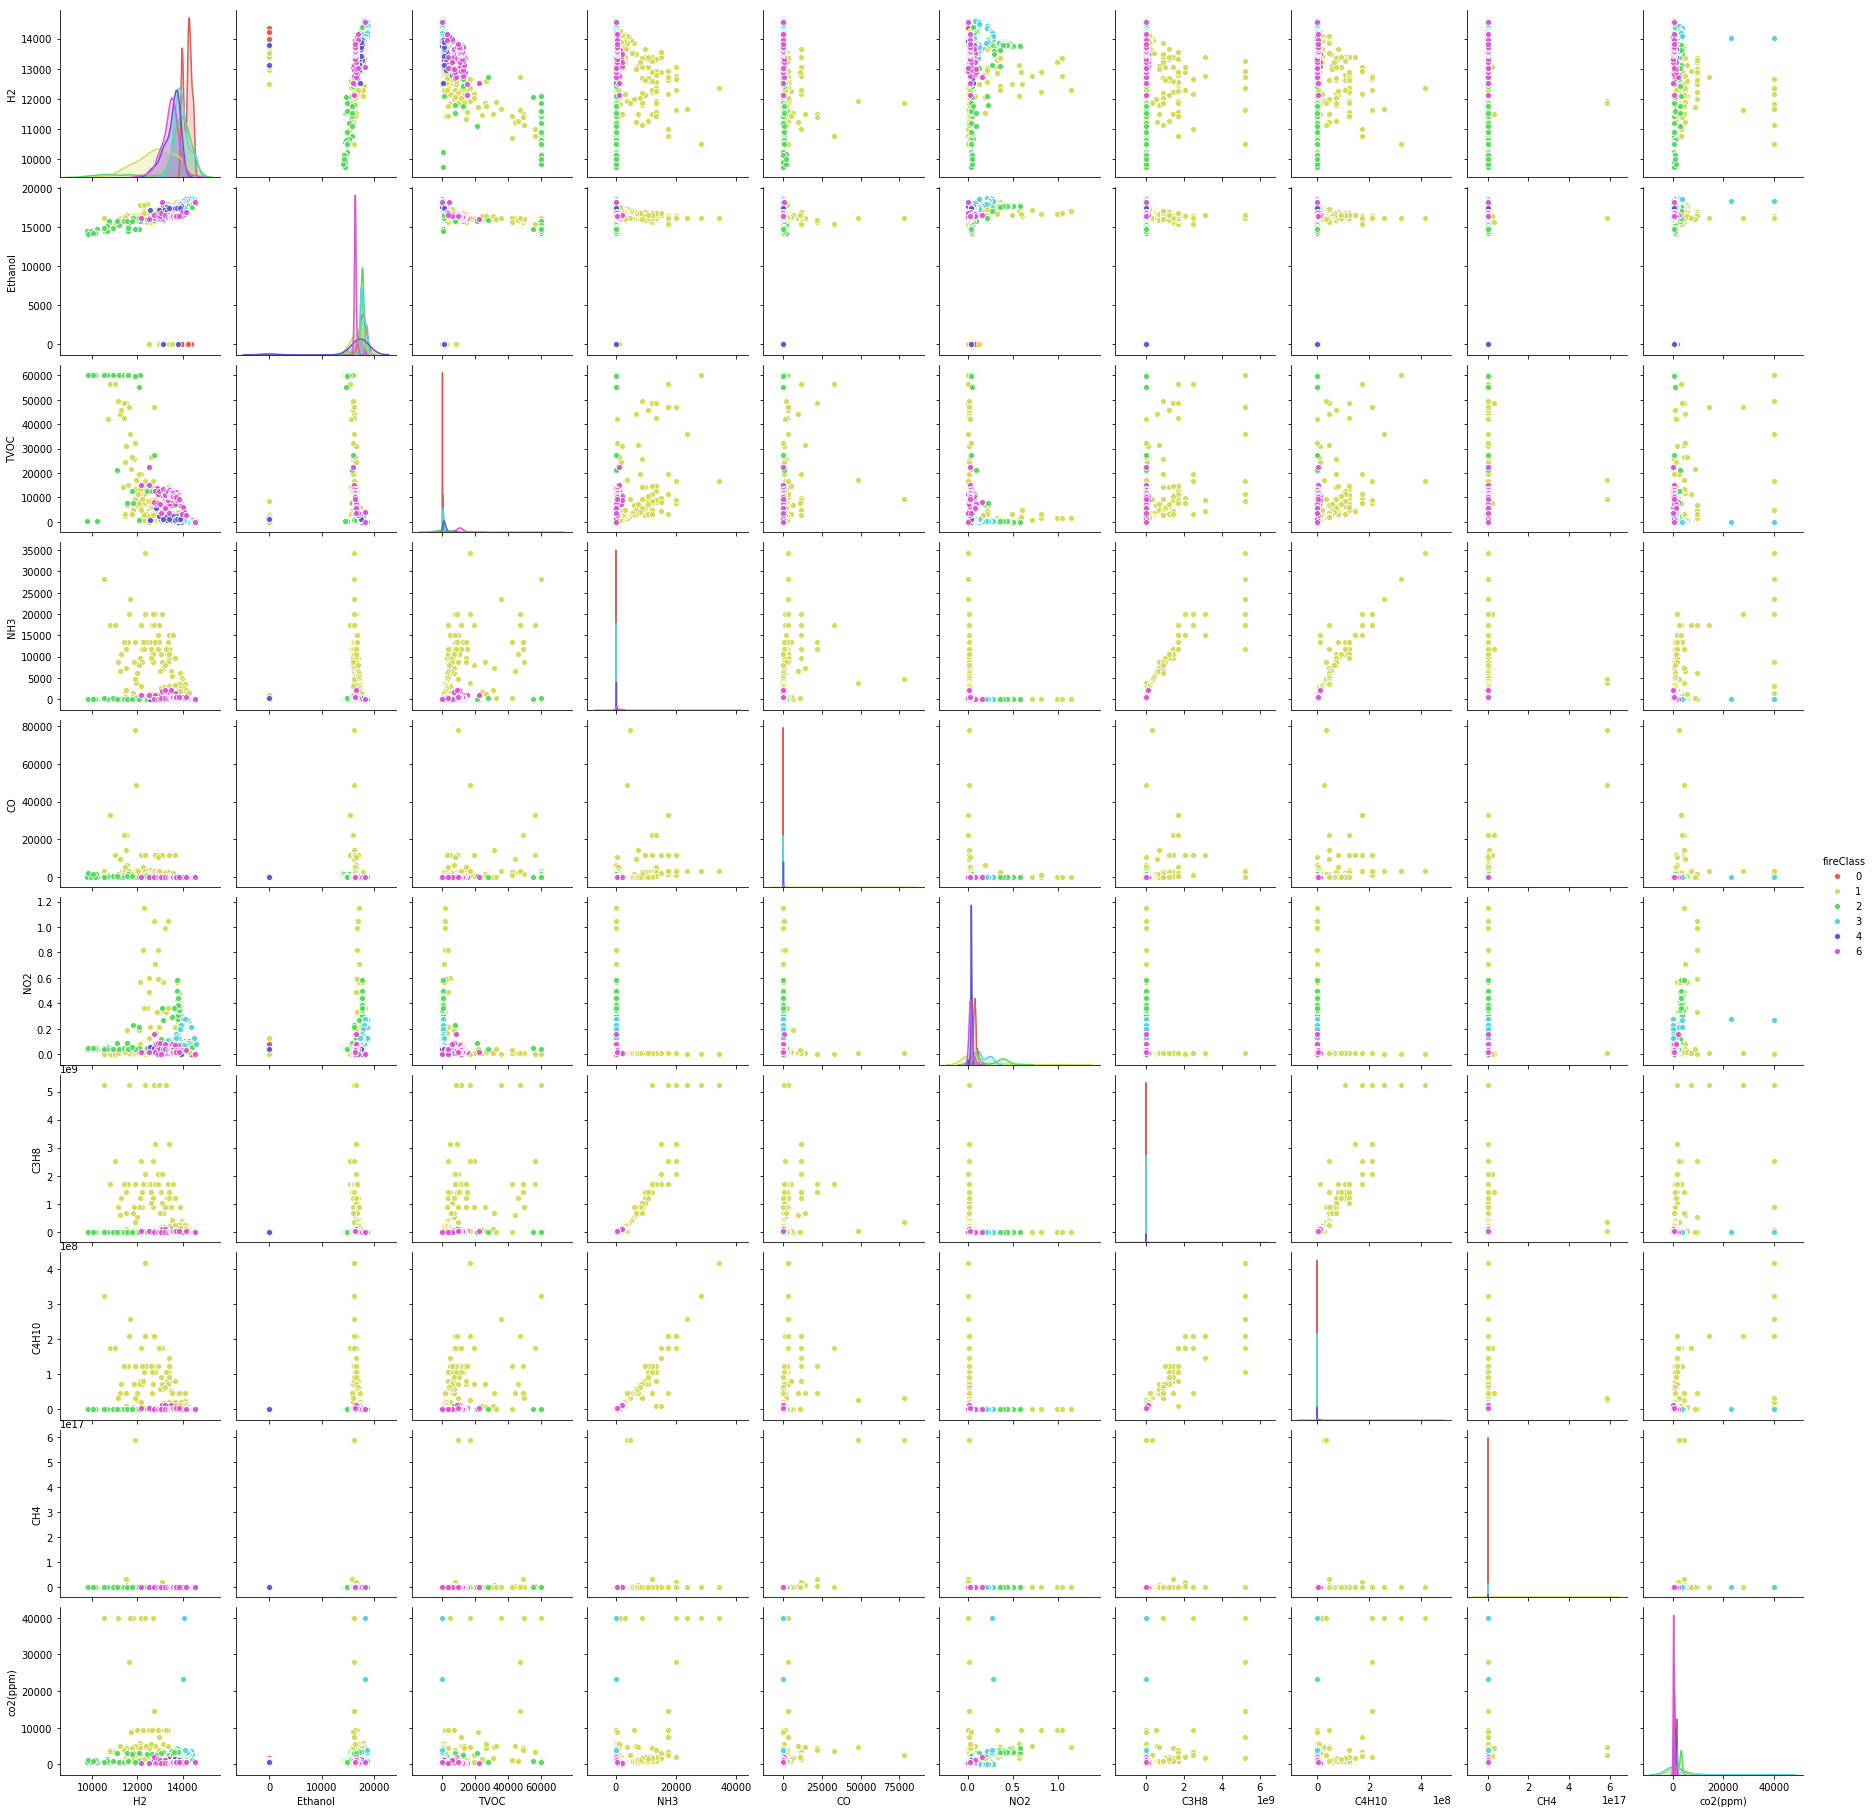

In [14]:
 sns.pairplot(df, hue='fireClass', 
             vars=[
                 'H2', 'Ethanol', 'TVOC', 'NH3', 'CO', 'NO2', 'C3H8', 'C4H10', 'CH4', 'co2(ppm)'
             ],
             palette="hls")

In [18]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [19]:
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.5,random_state=1)

In [20]:
# keras needs inputs to be vectors , so one hot encoding values
def one_hot_encode_object_array(arr):
    '''One hot encode a numpy array of objects (e.g. strings)'''
    uniques, ids = np.unique(arr, return_inverse=True)
    return np_utils.to_categorical(ids, len(uniques))


In [21]:
y_train_ohe=one_hot_encode_object_array(y_train)
y_test_ohe=one_hot_encode_object_array(y_test)


In [24]:
# Creating a model
# similar to DNN premade classifier
# https://www.tensorflow.org/tutorials/estimator/premade#instantiate_an_estimator
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(7, activation='softmax'))

# Compiling model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               3968      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_9 (Dense)              (None, 7)                 231       
Total params: 8,327
Trainable params: 8,327
Non-trainable params: 0
_________________________________________________________________


In [30]:
# tensorboard
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
# tensorboard --logdir logs/fit

X_train_array = np.asarray(X_train)
X_test_array = np.asarray(X_test)
#y_train_ohe
# Train (for 50 epochs)
model.fit(X_train_array,y_train_ohe,
          epochs=30,
          batch_size=1,
          #shuffle=True,
          callbacks=[tensorboard_callback],
          validation_data=(X_test_array, y_test_ohe),
          verbose=1)

Train on 626 samples, validate on 627 samples
Epoch 1/30
626/626 [==============================] - 4s 6ms/sample - loss: 35859675.9704 - accuracy: 0.7125 - val_loss: 7120184538.5582 - val_accuracy: 0.7767
Epoch 2/30
626/626 [==============================] - 4s 6ms/sample - loss: 35635393.5522 - accuracy: 0.7668 - val_loss: 7073528206.2624 - val_accuracy: 0.6587
Epoch 3/30
626/626 [==============================] - 4s 6ms/sample - loss: 35397531.6824 - accuracy: 0.7284 - val_loss: 7007579021.2422 - val_accuracy: 0.7337
Epoch 4/30
626/626 [==============================] - 4s 6ms/sample - loss: 35060356.3739 - accuracy: 0.7125 - val_loss: 6912039423.2807 - val_accuracy: 0.5088
Epoch 5/30
626/626 [==============================] - 4s 6ms/sample - loss: 34389429.9715 - accuracy: 0.7252 - val_loss: 6741311675.9578 - val_accuracy: 0.7927
Epoch 6/30
626/626 [==============================] - 4s 6ms/sample - loss: 32494525.4671 - accuracy: 0.7476 - val_loss: 6096579648.8939 - val_accuracy: 0

In [31]:
model.save('model_all.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

model = load_model('model_all.h5')

In [32]:
#Evaluate the Model
loss, accuracy = model.evaluate(X_test_array, y_test_ohe, verbose=1)
print("Accuracy = {:.2f}".format(accuracy))

627/627 [==============================] - 0s 208us/sample - loss: 12226363819.4170 - accuracy: 0.7480
Accuracy = 0.75


              precision    recall  f1-score   support

           0       0.88      0.67      0.76       222
           1       0.78      0.70      0.74        91
           2       0.94      0.87      0.91       175
           3       0.20      0.81      0.33        26
           4       0.51      0.96      0.67        25
           5       1.00      1.00      1.00        43
           6       0.76      0.36      0.48        45

   micro avg       0.75      0.75      0.75       627
   macro avg       0.73      0.77      0.70       627
weighted avg       0.84      0.75      0.77       627

[[148   0   1  73   0   0   0]
 [  6  64   3   7   8   0   3]
 [ 12   7 153   0   1   0   2]
 [  3   0   2  21   0   0   0]
 [  0   0   1   0  24   0   0]
 [  0   0   0   0   0  43   0]
 [  0  11   2   2  14   0  16]]


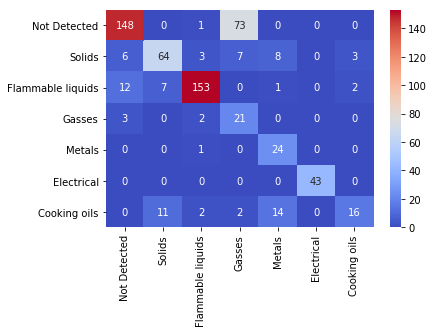

In [33]:
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test_ohe,axis=1) # convert encoded labels into classes: say [0, 0, 1] -->  [2] 
y_pred_class = np.argmax(y_pred,axis=1) # convert predicted labels into classes: say [0.00023, 0.923, 0.031] -->  [1] 

from sklearn.metrics import classification_report, confusion_matrix

# #Accuracy of the predicted values
print(classification_report(y_test_class, y_pred_class)) # Precision , Recall, F1-Score & Support

cm = confusion_matrix(y_test_class, y_pred_class)
print(cm)

# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cmap="coolwarm",
                      xticklabels=class_names, yticklabels=class_names)


In [34]:
predict_dataset = tf.convert_to_tensor([
    [1450.82,553.79,948.55,442.83,655.52,806.57,362.26,412.39,1135.77,247.28,388.21,69.81,103.39,74.93,157.61,380.79,144.40,67.47,13972.00,17659.00,1.00,5.81,3.53,0.07,14599.71,6195.26,282.35,1711.00,26.38,42.01],
    [1569.30,592.95,956.07,454.21,630.83,775.13,350.63,400.87,1088.45,239.64,371.00,70.60,105.13,76.58,140.20,342.12,146.81,76.84,12239.00,16698.00,1567.00,5.10,20.48,0.82,11897.34,12088.24,170155.48,9480.00,37.85,28.24],
    [1439.17,556.59,952.31,447.57,645.05,793.71,357.41,408.07,1113.23,244.31,376.38,70.60,105.13,76.58,151.20,364.38,146.21,72.15,13809.00,17743.00,13.00,1.13,3.53,0.45,1287.24,765.34,282.35,3204.00,36.31,30.01],
    [1540.16,574.30,954.19,448.52,645.05,793.71,357.90,408.07,1112.11,244.73,373.15,69.81,103.39,74.11,146.62,359.70,143.79,70.28,13523.00,16436.00,2854.00,108.58,13.19,0.04,1124697.75,263286.88,27271.54,2495.00,37.09,27.43],
])

predictions = model(predict_dataset)

def percentages(n): 
    return "{: 6.1f}%".format(100*n)

print(',  '.join(class_names))

for i, logits in enumerate(predictions):
  results = map(percentages, logits)

  class_idx = tf.argmax(logits).numpy()
  p = tf.nn.softmax(logits)[class_idx]
  name = class_names[class_idx]
  print("{} \t Sample #{} prediction: {} ({:4.1f}%)".format(', '.join(results), i, name, 100*p))
    
    

Not Detected,  Solids,  Flammable liquids,  Gasses,  Metals,  Electrical,  Cooking oils
 100.0%,    0.0%,    0.0%,    0.0%,    0.0%,    0.0%,    0.0% 	 Sample #0 prediction: Not Detected (31.2%)
   0.0%,  100.0%,    0.0%,    0.0%,    0.0%,    0.0%,    0.0% 	 Sample #1 prediction: Solids (31.2%)
   0.0%,    0.0%,  100.0%,    0.0%,    0.0%,    0.0%,    0.0% 	 Sample #2 prediction: Flammable liquids (31.2%)
   0.0%,    0.0%,  100.0%,    0.0%,    0.0%,    0.0%,    0.0% 	 Sample #3 prediction: Flammable liquids (31.2%)
